In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath_customer='/content/drive/MyDrive/FMCG/dim_customers.csv'
filepath_date='/content/drive/MyDrive/FMCG/dim_date.csv'
filepath_product='/content/drive/MyDrive/FMCG/dim_products.csv'
filepath_target='/content/drive/MyDrive/FMCG/dim_targets_orders.csv'
filepath_line='/content/drive/MyDrive/FMCG/fact_order_lines.csv'
filepath_aggregate='/content/drive/MyDrive/FMCG/fact_orders_aggregate.csv'

In [3]:
df_customer=pd.read_csv(filepath_customer)
df_date=pd.read_csv(filepath_date)
df_product=pd.read_csv(filepath_product)
df_target=pd.read_csv(filepath_target)
df_line=pd.read_csv(filepath_line)
df_aggregate=pd.read_csv(filepath_aggregate)

In [4]:
df_customer.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [5]:
df_date.head()

,date,mmm_yy,week_no
0,2022-04-01,2022-04-01,W 14
1,2022-04-03,2022-04-01,W 15
2,2022-04-04,2022-04-01,W 15
3,2022-04-05,2022-04-01,W 15
4,2022-04-06,2022-04-01,W 15


In [6]:
df_product.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [7]:
df_target.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [8]:
df_line.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1
2,FMR33320501,2022-03-01,789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0
3,FMR34220601,2022-03-01,789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1
4,FMR33703603,2022-03-01,789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1


In [9]:
df_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,2022-03-01,1,0,0
1,FMR34103403,789103,2022-03-01,1,0,0
2,FMR32103602,789103,2022-03-01,1,0,0
3,FMR33103602,789103,2022-03-01,1,0,0
4,FMR33103401,789103,2022-03-01,1,0,0


# Data Cleaning

In [10]:
# change data types

In [11]:
df_line['actual_delivery_date']=pd.to_datetime(df_line['actual_delivery_date'])
df_line['agreed_delivery_date']=pd.to_datetime(df_line['agreed_delivery_date'])
df_line['order_placement_date']=pd.to_datetime(df_line['order_placement_date'])
df_aggregate['order_placement_date']=pd.to_datetime(df_aggregate['order_placement_date'])
df_date['date']=pd.to_datetime(df_date['date'])

# Data Analysis

In [12]:
# Total Number of customers Citywise
df_customer.groupby(['city']).agg({'customer_id':'nunique'}).rename(columns={'customer_id':'Customers'})

,Customers
city,
Ahmedabad,12
Surat,11
Vadodara,12


Text(0.5, 1.0, 'Citywise Customer Count')

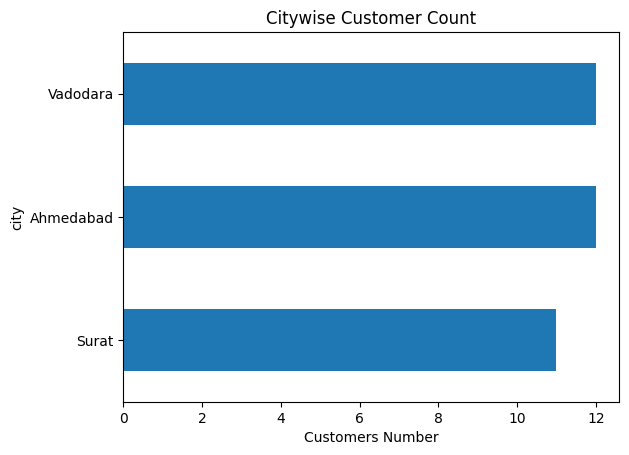

In [13]:
df_customer.groupby(['city']).agg({'customer_id':'nunique'}).rename(columns={'customer_id':'Customers'}).sort_values(by='Customers').plot(kind='barh',legend=False)
plt.xlabel('Customers Number')
plt.title('Citywise Customer Count')

In [14]:
# Categorywise Products
df_product.groupby(['category']).agg({'product_id':'nunique'}).rename(columns={'product_id':'product_count'})

,product_count
category,
Dairy,12
Food,3
beverages,3


array([<Axes: ylabel='product_count'>], dtype=object)

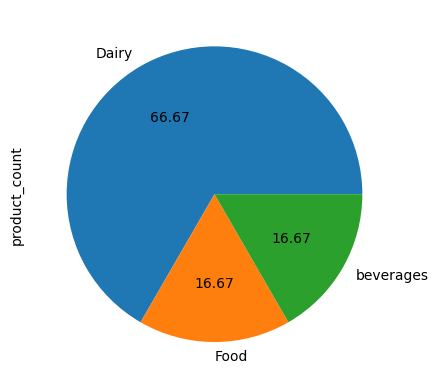

In [15]:
df_product.groupby(['category']).agg({'product_id':'nunique'}).rename(columns={'product_id':'product_count'}).plot(kind='pie',subplots=True,autopct='%0.2f',legend=False)

In [16]:
# Customerwise Orders
x=pd.merge(df_customer,df_aggregate,how='left',on='customer_id')
x1=x.groupby(['customer_name']).agg({'order_id':'nunique'}).rename(columns={'order_id':'orders'}).sort_values(by='orders')
x1

,orders
customer_name,
Viveks Stores,1633
Elite Mart,1637
Chiptec Stores,1642
Atlas Stores,1646
Expert Mart,1657
Sorefoz Mart,1661
Expression Stores,1662
Info Stores,1669
Logic Stores,1676


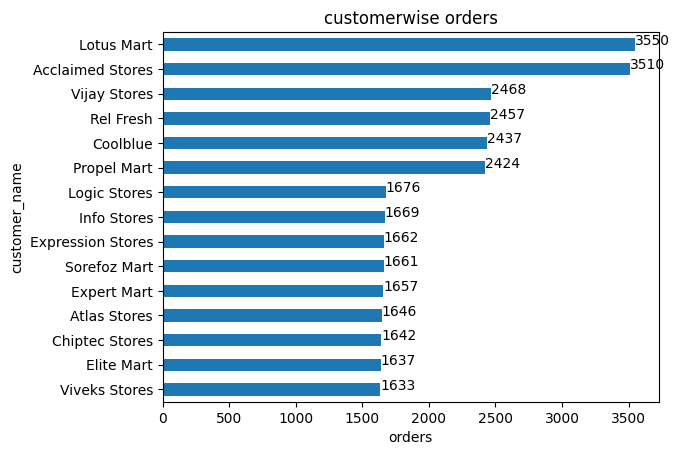

In [17]:
ax=x1.plot(kind='barh',legend=False)
plt.xlabel('orders')
plt.title('customerwise orders')
for index, value in enumerate(x1['orders']):
    ax.text(value, index, str(value))
plt.show()

In [18]:
x2=x.groupby(['city']).agg({'order_id':'nunique'}).rename(columns={'order_id':'orders'}).sort_values(by='orders')
x2

,orders
city,
Surat,9696
Vadodara,10972
Ahmedabad,11061


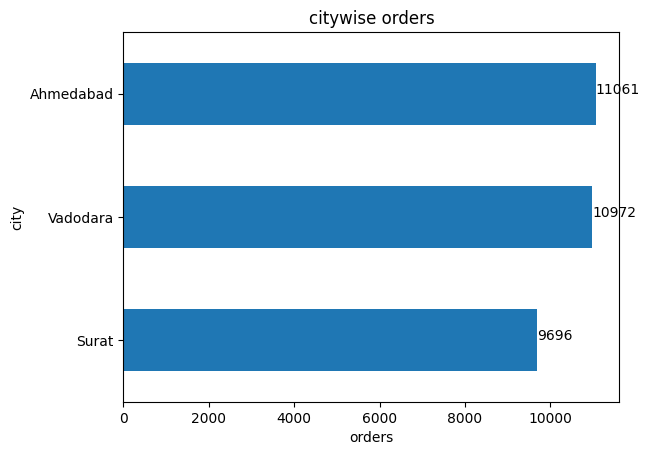

In [19]:
ax2=x2.plot(kind='barh',legend=False)
plt.xlabel('orders')
plt.title('citywise orders')
for index, value in enumerate(x2['orders']):
    ax2.text(value, index, str(value))
plt.show()

In [20]:
# Customerwise OT,IF,OTIF
IF=x[x['in_full']==1].groupby(['customer_name']).agg({'order_id':'nunique'}).rename(columns={'order_id':'IF'})
OT=x[x['on_time']==1].groupby(['customer_name']).agg({'order_id':'nunique'}).rename(columns={'order_id':'OT'})
OTIF=x[x['otif']==1].groupby(['customer_name']).agg({'order_id':'nunique'}).rename(columns={'order_id':'OTIF'})

In [21]:
IF_percentage=IF['IF']*100/x1['orders']
OT_percentage=OT['OT']*100/x1['orders']
OTIF_percentage=OTIF['OTIF']*100/x1['orders']

<Axes: xlabel='customer_name'>

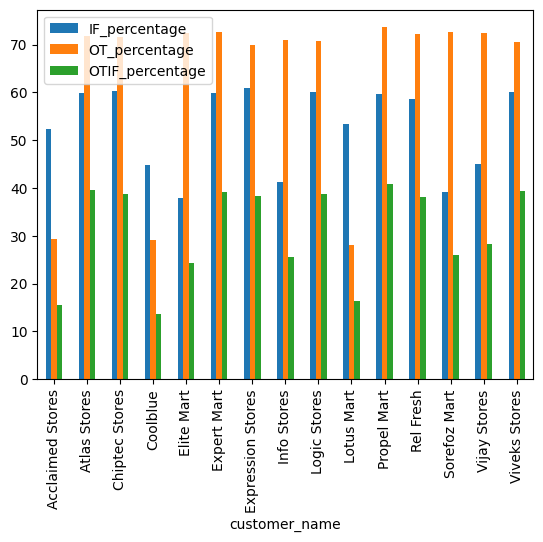

In [22]:
IF_pct=pd.DataFrame(IF_percentage,columns=['IF_percentage']).reset_index()
OT_pct=pd.DataFrame(OT_percentage,columns=['OT_percentage']).reset_index()
OTIF_pct=pd.DataFrame(OTIF_percentage,columns=['OTIF_percentage']).reset_index()
b1=pd.merge(IF_pct,OT_pct,on='customer_name')
b2=pd.merge(b1,OTIF_pct,on='customer_name')
b2.set_index('customer_name').plot(kind='bar')

In [23]:
# Customerwise VFR (Volume Fill Rate)
x=pd.merge(df_customer,df_line,on='customer_id')
v=x.groupby(['customer_name']).agg({'order_qty':'sum','delivery_qty':'sum'})
v['VFR']=v['delivery_qty']*100/v['order_qty']
v['VFR']=v['VFR'].round(2)
VFR=v['VFR']
VFR=pd.DataFrame(VFR)
VFR.sort_values(by='VFR',ascending=False)

,VFR
customer_name,
Propel Mart,97.70
Atlas Stores,97.58
Chiptec Stores,97.58
Viveks Stores,97.57
Expression Stores,97.54
Logic Stores,97.45
Expert Mart,97.44
Rel Fresh,97.43
Lotus Mart,96.01


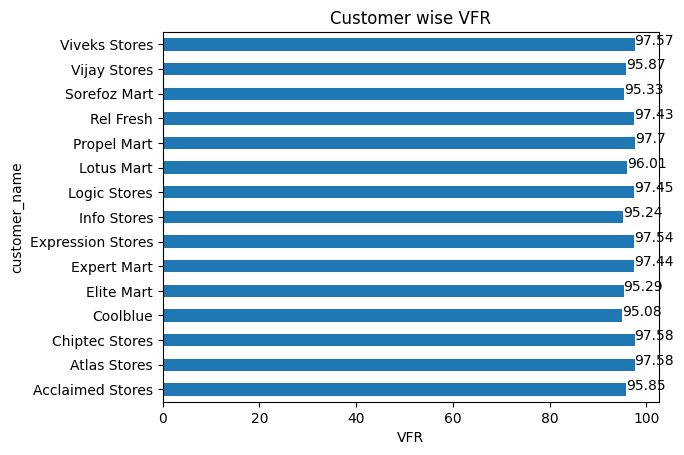

In [24]:
ax3=VFR.plot(kind='barh',legend=False)
plt.xlabel('VFR')
plt.title('Customer wise VFR')
for index, value in enumerate(VFR['VFR']):
    ax3.text(value, index, str(value))
plt.show()

In [25]:
# Customerwise LIFR(Line In Fill Rate)
LIFR=IF['IF']*100/x1['orders']
LIFR=pd.DataFrame(LIFR).rename(columns={0:'LIFR'})
LIFR['LIFR']=LIFR['LIFR'].round(2)
LIFR

,LIFR
customer_name,
Acclaimed Stores,52.36
Atlas Stores,59.78
Chiptec Stores,60.35
Coolblue,44.73
Elite Mart,37.94
Expert Mart,59.81
Expression Stores,60.83
Info Stores,41.16
Logic Stores,60.14


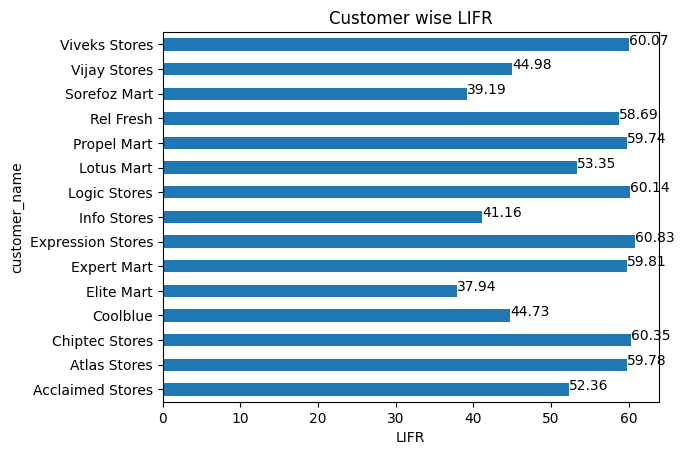

In [26]:
ax4=LIFR.plot(kind='barh',legend=False)
plt.xlabel('LIFR')
plt.title('Customer wise LIFR')
for index, value in enumerate(LIFR['LIFR']):
    ax4.text(value, index, str(value))
plt.show()

In [27]:
# Customer wise Target OT,IF,OTIF Percentage
target=pd.merge(df_customer,df_target,on='customer_id').groupby(['customer_name']).agg({'ontime_target%':'mean','infull_target%':'mean','otif_target%':'mean'})
target

,ontime_target%,infull_target%,otif_target%
customer_name,,,
Acclaimed Stores,76.333333,75.333333,57.666667
Atlas Stores,88.000000,78.000000,68.500000
Chiptec Stores,89.000000,81.000000,72.000000
Coolblue,77.000000,71.000000,54.500000
Elite Mart,91.000000,73.000000,66.500000
Expert Mart,91.000000,80.000000,73.000000
Expression Stores,88.500000,78.000000,69.000000
Info Stores,92.000000,71.000000,65.500000
Logic Stores,87.500000,76.000000,66.500000


In [28]:
comp=pd.merge(b2.set_index('customer_name'),target,on='customer_name')
comp['IF Deviation']=comp['infull_target%']-comp['IF_percentage']
comp['OT Deviation']=comp['ontime_target%']-comp['OT_percentage']
comp['OTIF Deviation']=comp['otif_target%']-comp['OTIF_percentage']
comp

,IF_percentage,OT_percentage,OTIF_percentage,ontime_target%,infull_target%,otif_target%,IF Deviation,OT Deviation,OTIF Deviation
customer_name,,,,,,,,,
Acclaimed Stores,52.364672,29.430199,15.470085,76.333333,75.333333,57.666667,22.968661,46.903134,42.196581
Atlas Stores,59.781288,71.810450,39.550425,88.000000,78.000000,68.500000,18.218712,16.189550,28.949575
Chiptec Stores,60.353228,71.619976,38.733252,89.000000,81.000000,72.000000,20.646772,17.380024,33.266748
Coolblue,44.727124,29.134181,13.746410,77.000000,71.000000,54.500000,26.272876,47.865819,40.753590
Elite Mart,37.935247,72.449603,24.373855,91.000000,73.000000,66.500000,35.064753,18.550397,42.126145
Expert Mart,59.806880,72.540736,39.106820,91.000000,80.000000,73.000000,20.193120,18.459264,33.893180
Expression Stores,60.830325,69.915764,38.387485,88.500000,78.000000,69.000000,17.169675,18.584236,30.612515
Info Stores,41.162373,70.940683,25.524266,92.000000,71.000000,65.500000,29.837627,21.059317,39.975734
Logic Stores,60.143198,70.823389,38.782816,87.500000,76.000000,66.500000,15.856802,16.676611,27.717184


Text(0.5, 1.0, 'Customer wise IF.OT,OTIF Deviation')

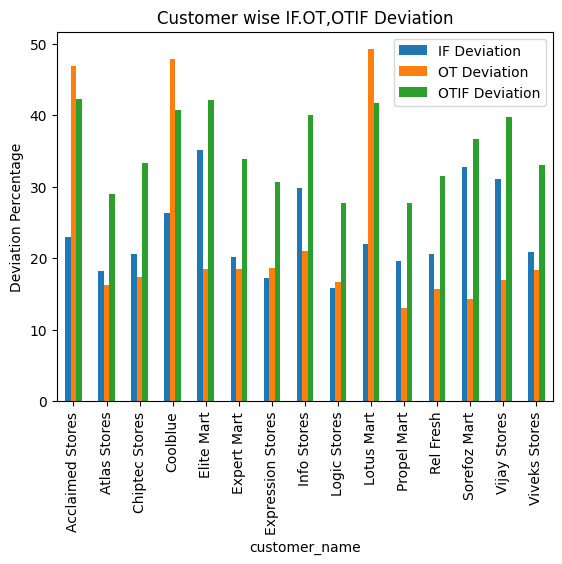

In [29]:
comp[['IF Deviation',	'OT Deviation',	'OTIF Deviation']].plot(kind='bar')
plt.ylabel('Deviation Percentage')
plt.title('Customer wise IF.OT,OTIF Deviation')

In [30]:
# Customerwise Category wise order percentage
a1=pd.merge(df_customer,df_line,how='left',on='customer_id')
a2=pd.merge(df_product,a1,how='left',on='product_id')
a3=a2.groupby(['customer_name','category']).agg({'order_id':'nunique'}).rename(columns={'order_id':'orders'}).reset_index()
pivot_data=a3.pivot(index='customer_name',columns='category',values='orders')
pivot_data_percentage=pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
pivot_data_percentage

category,Dairy,Food,beverages
customer_name,,,
Acclaimed Stores,62.798552,18.311218,18.890229
Atlas Stores,57.403387,21.971342,20.625271
Chiptec Stores,57.641921,21.310044,21.048035
Coolblue,63.126946,18.678658,18.194396
Elite Mart,57.278208,21.403962,21.317829
Expert Mart,57.370853,21.965561,20.663587
Expression Stores,57.314457,20.720721,21.964822
Info Stores,58.689090,20.482967,20.827943
Logic Stores,58.838599,20.922289,20.239112


Text(0.5, 1.0, 'Customer wise Order category')

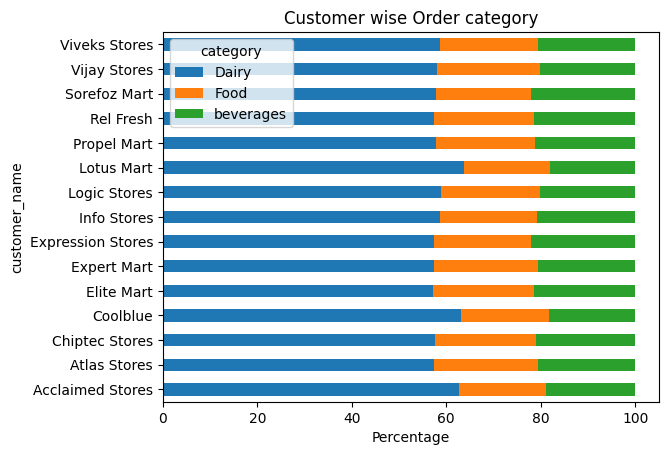

In [31]:
pivot_data_percentage.plot(kind='barh',stacked=True)
plt.xlabel('Percentage')
plt.title('Customer wise Order category')

In [32]:
b1=a2.groupby(['customer_name','product_name']).agg({'order_id':'nunique'}).reset_index()
b1['rnk_max']=b1.sort_values(by=['order_id'],ascending=False).groupby(['customer_name']).cumcount()+1
b1['rnk_min']=b1.sort_values(by=['order_id'],ascending=True).groupby(['customer_name']).cumcount()+1
most_ordered=b1[b1['rnk_max']==1][['customer_name','product_name']]
least_ordered=b1[b1['rnk_min']==1][['customer_name','product_name']]

In [33]:
# Customerwise most & least ordered product
pd.merge(most_ordered,least_ordered,on='customer_name').rename(columns={'product_name_x':'most_ordered_product','product_name_y':'least_ordered_product'}).set_index('customer_name')

,most_ordered_product,least_ordered_product
customer_name,,
Acclaimed Stores,AM Tea 500,AM Butter 250
Atlas Stores,AM Biscuits 250,AM Tea 100
Chiptec Stores,AM Ghee 250,AM Curd 50
Coolblue,AM Biscuits 500,AM Tea 250
Elite Mart,AM Curd 250,AM Ghee 250
Expert Mart,AM Curd 100,AM Ghee 150
Expression Stores,AM Butter 100,AM Ghee 100
Info Stores,AM Butter 100,AM Ghee 100
Logic Stores,AM Ghee 250,AM Ghee 100


# Trend Analysis

In [34]:
trend=pd.merge(df_date,df_aggregate,how='left',left_on='date',right_on='order_placement_date')
orders=trend.groupby(['week_no']).agg({'order_id':'nunique'}).rename(columns={'order_id':'orders'})
ot=trend[trend['on_time']==1].groupby(['week_no']).agg({'order_id':'nunique'}).rename(columns={'order_id':'on_time'})
IF=trend[trend['in_full']==1].groupby(['week_no']).agg({'order_id':'nunique'}).rename(columns={'order_id':'in_full'})
otif=trend[trend['otif']==1].groupby(['week_no']).agg({'order_id':'nunique'}).rename(columns={'order_id':'otif'})

In [35]:
ot_pct=ot['on_time']*100/orders['orders']
if_pct=IF['in_full']*100/orders['orders']
otif_pct=otif['otif']*100/orders['orders']

In [36]:
OT_Trend=pd.DataFrame(ot_pct).rename(columns={0:'ot_pct'}).reset_index()
IF_Trend=pd.DataFrame(if_pct).rename(columns={0:'if_pct'}).reset_index()
OTIF_Trend=pd.DataFrame(otif_pct).rename(columns={0:'otif_pct'}).reset_index()

Text(0.5, 1.0, 'Weekly Trend of IF,OT,OTIF Percentage')

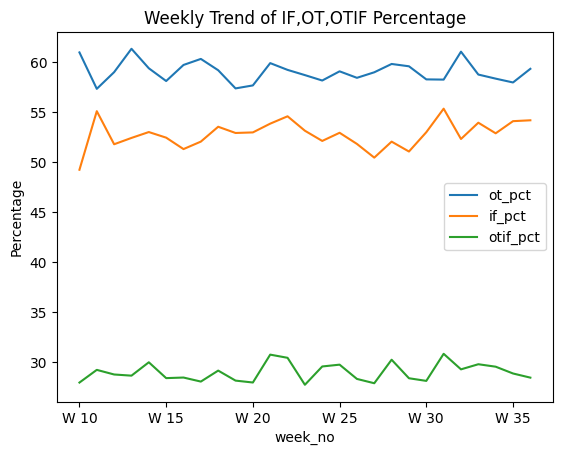

In [37]:
x1=pd.merge(OT_Trend,IF_Trend,how='inner',on='week_no')
x2=pd.merge(x1,OTIF_Trend,how='inner',on='week_no')
x2.set_index('week_no').plot(kind='line')
plt.ylabel('Percentage')
plt.title('Weekly Trend of IF,OT,OTIF Percentage')

In [38]:
# customerwise Average lead days
a1['lead_time']=(a1['actual_delivery_date']-a1['order_placement_date'])/np.timedelta64(1, 'D')
c1=a1.groupby(['customer_name']).agg({'lead_time':'mean'})
c1['lead_time']=c1['lead_time'].round(2)
c1.sort_values(by='lead_time')

,lead_time
customer_name,
Propel Mart,2.14
Atlas Stores,2.15
Elite Mart,2.15
Rel Fresh,2.16
Sorefoz Mart,2.16
Vijay Stores,2.16
Chiptec Stores,2.18
Expert Mart,2.19
Info Stores,2.20


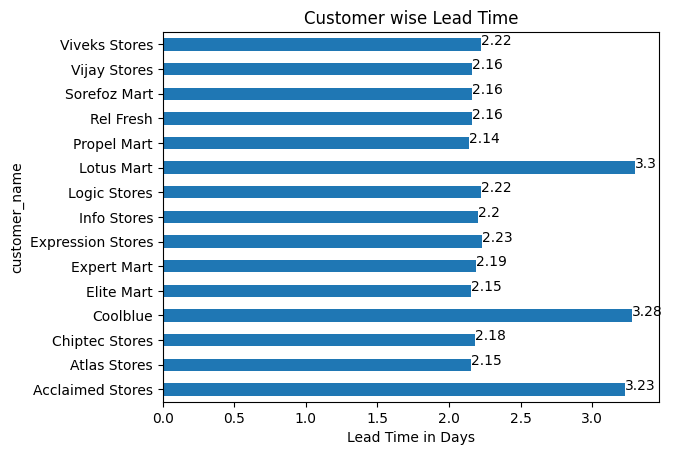

In [39]:
ax6=c1.plot(kind='barh',legend=False)
plt.xlabel('Lead Time in Days')
plt.title('Customer wise Lead Time')
for index, value in enumerate(c1['lead_time']):
    ax6.text(value, index, str(value))
plt.show()

In [40]:
# WEEKLY TARGET OT%,IF%,OTIF%
y=pd.merge(df_date,df_aggregate,how='left',left_on='date',right_on='order_placement_date')
y1=pd.merge(df_target,y,how='left',on='customer_id')
target_df=y1.groupby(['week_no']).agg({'ontime_target%':'mean','infull_target%':'mean','otif_target%':'mean'}).rename(columns={'ontime_target%':'OT_target','infull_target%':'IF_target','otif_target%':'OTIF_target'})
target_df=target_df.reset_index()
target_df

,week_no,OT_target,IF_target,OTIF_target
0,W 10,85.140391,76.176064,64.915995
1,W 11,85.328275,76.382588,65.222843
2,W 12,85.176230,76.311475,65.057377
3,W 13,85.403799,76.390586,65.293146
4,W 14,85.248550,76.395195,65.173985
5,W 15,85.103448,76.251232,64.946634
6,W 16,85.132838,76.349010,65.048680
7,W 17,85.313869,76.370641,65.202758
8,W 18,85.385299,76.255250,65.162359
9,W 19,85.261767,76.252684,65.073493


Text(0.5, 1.0, 'Weekly OT_Target and OT Percentage')

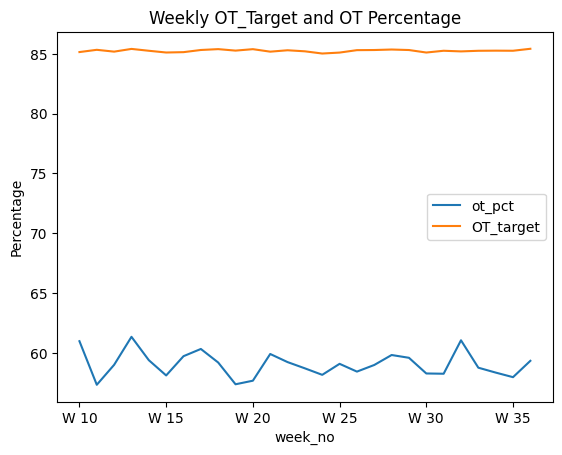

In [41]:
# OT% AND TARGET OT% TREND
pd.merge(x2,target_df,on='week_no')[['week_no','ot_pct','OT_target']].set_index('week_no').plot(kind='line')
plt.ylabel('Percentage')
plt.title('Weekly OT_Target and OT Percentage')

Text(0.5, 1.0, 'Weekly IF_Target and IF Percentage')

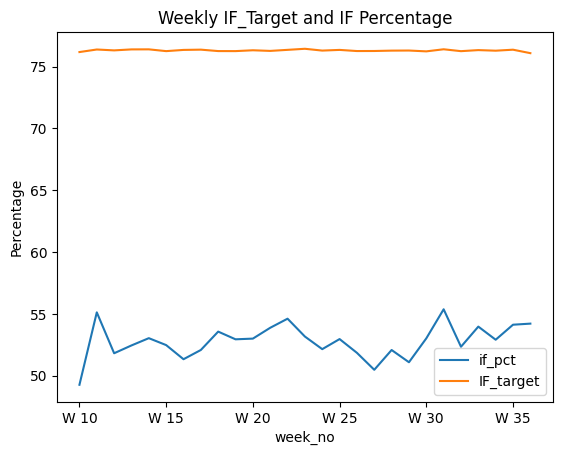

In [42]:
# IF% AND TARGET IF% TREND
pd.merge(x2,target_df,on='week_no')[['week_no','if_pct','IF_target']].set_index('week_no').plot(kind='line')
plt.ylabel('Percentage')
plt.title('Weekly IF_Target and IF Percentage')

Text(0.5, 1.0, 'Weekly OTIF_Target and OTIF Percentage')

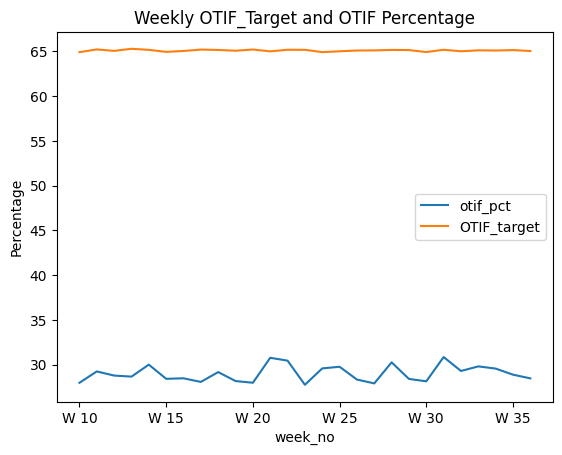

In [43]:
# OTIF% AND TARGET OTIF% TREND
pd.merge(x2,target_df,on='week_no')[['week_no','otif_pct','OTIF_target']].set_index('week_no').plot(kind='line')
plt.ylabel('Percentage')
plt.title('Weekly OTIF_Target and OTIF Percentage')